# Py-planarity

https://gmarti.gitlab.io/networks/2018/06/03/pmfg-algorithm.html  
https://github.com/hagberg/planarity   
http://iopscience.iop.org/article/10.1088/1367-2630/12/8/085009/meta    

** WORK IN PROGRESS!!! **

In [16]:
!pip install planarity

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Planar Maximally Filtered Graph (PMFG)

https://gmarti.gitlab.io/networks/2018/06/03/pmfg-algorithm.html   
Author: Gautier Marti   

Graphs in `networkx` are lists of tuples with dicts for the data:   
`complete_graph=   
[(0, 1, {'weight': 0.6086214237772668}),
 (0, 2, {'weight': 0.1935050775536189})]`   

Edges are lists of dicts.    
`edges =    
[{'dest': 58, 'source': 55, 'weight': 0.00010910941419339792},       
 {'dest': 89, 'source': 66, 'weight': 0.00016536819362844568}]`

## `sort_graph_edges`

In [17]:
def sort_graph_edges(G):
    sorted_edges = []
    for source, dest, data in sorted(G.edges(data=True),
                                     key=lambda x: x[2]['weight']):
        sorted_edges.append({'source': source,
                             'dest': dest,
                             'weight': data['weight']})
    return sorted_edges

## `compute_PMFG`

Add edges one-by-one, for which `planarity.is_planar` is true, until we have enough $3(n-2)$ edges.

In [18]:
def compute_PMFG(sorted_edges, nb_nodes):
    PMFG = nx.Graph()
    for edge in sorted_edges:
        PMFG.add_edge(edge['source'], edge['dest'],weight=edge['weight'])
        if not planarity.is_planar(PMFG):
            PMFG.remove_edge(edge['source'], edge['dest'])   
        if len(PMFG.edges()) == 3*(nb_nodes-2):
            break
    return PMFG

In [19]:
import numpy as np
from scipy.spatial.distance import squareform
import networkx as nx
import planarity

#### Create graph `complete_graph`

https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html

In [20]:
nb_nodes = 150
distances = squareform(np.random.uniform(
    size=int(nb_nodes * (nb_nodes - 1) / 2)))
distances[np.diag_indices(nb_nodes)] = np.ones(nb_nodes)
complete_graph = nx.Graph()
for i in range(nb_nodes):
    for j in range(i+1, nb_nodes):
        complete_graph.add_edge(i, j, weight=distances[i,j])

In [21]:
complete_graph.edges(data=True)[0:2]

[(0, 1, {'weight': 0.5698033109307709}),
 (0, 2, {'weight': 0.24646593617359147})]

In [22]:
sorted_edges = sort_graph_edges(complete_graph)

In [23]:
PMFG = compute_PMFG(sorted_edges, len(complete_graph.nodes()))

In [24]:
sorted_edges[0:3]

[{'dest': 146, 'source': 85, 'weight': 1.1183174018603026e-05},
 {'dest': 120, 'source': 46, 'weight': 3.020266291775542e-05},
 {'dest': 89, 'source': 78, 'weight': 3.1939062713037814e-05}]

In [25]:
PMFG.edges(data=True)[0:2]

[(85, 146, {'weight': 1.1183174018603026e-05}),
 (85, 148, {'weight': 0.023371376847945435})]

We finally obtain the PMFG which has only $3(n-2)$ edges instead of $n(n-1)/2$.

In [26]:
print(len(PMFG.edges()), "edges instead of", int(nb_nodes*(nb_nodes-1)/2))

444 edges instead of 11175


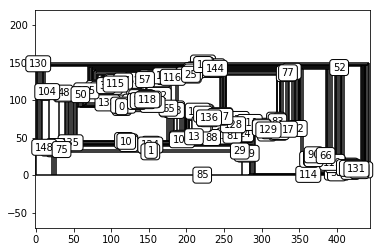

In [27]:
planarity.draw(PMFG)

### Plotly

In [31]:
!pip install python-igraph

    100% |████████████████████████████████| 378kB 8.7MB/s eta 0:00:01
  Running setup.py bdist_wheel for python-igraph ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/41/d6/02/34eebae97e25f5b87d60f4c0687e00523e3f244fa41bc3f4a7
Successfully built python-igraph
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [28]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
#import numpy as np
import igraph as ig

In [78]:
plotly.tools.set_credentials_file(username='IanBuckley', api_key='Z4HJZpdeW4wss1tnizq8')

### Plotly plot

Set data for the Plotly plot of the graph:

In [30]:
Xn=[layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(N)]# y-coordinates
Zn=[layt[k][2] for k in range(N)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in Edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]

NameError: name 'N' is not defined

In [ ]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

#### `trace1` & `trace2` are lines & nodes, resp.

In [ ]:
trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size=6,
                             color=group,
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=labels,
               hoverinfo='text'
               )

In [ ]:
axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

#### `layout`

In [ ]:
layout = go.Layout(
         title="Network of coappearances of characters in Victor Hugo's novel<br> Les Miserables (3D visualization)",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="Data source: <a href='http://bost.ocks.org/mike/miserables/miserables.json'>[1] miserables.json</a>",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

#### Call `plotly.iplot`, `graph_objs.Figure` on `data`, `layout`

In [ ]:
data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Les-Miserables')

## Examples from `planarity`

### `networkx_draw.py`

In [ ]:
import planarity
import networkx as nx
import matplotlib.pyplot as plt
G=nx.wheel_graph(10)
planarity.draw(G)

In [ ]:
plt.axis('off')
plt.savefig('wheel.png')

### `graph_formats.py`

In [ ]:
import planarity
# Example of the complete graph of 5 nodes, K5
# K5 is not planar
# any of the following formats can bed used for representing the graph

In [ ]:
edgelist = [(0, 1), (0, 2), (0, 3), (0, 4),
            (1, 2),(1, 3),(1, 4),
            (2, 3), (2, 4),
            (3, 4)]

dictofdicts = {0: {1: {}, 2: {}, 3: {}, 4: {}},
               1: {2: {}, 3: {}, 4: {}},
               2: {3: {}, 4: {}},
               3: {4: {}},
               4: {}}

dictofsets = {0: set([1,2,3,4]),
              1: set([2,3,4]),
              2: set([3,4]),
              3: set([4]),
              4: set([])}

dictoflists = {0: list([1,2,3,4]),
               1: list([2,3,4]),
               2: list([3,4]),
               3: list([4]),
               4: list([])}

In [ ]:
print(planarity.is_planar(edgelist))  # False
print(planarity.is_planar(dictofdicts)) # False
print(planarity.is_planar(dictofsets)) # False
print(planarity.is_planar(dictoflists)) # False

## Random correlation matrix

### 327-network-from-correlation-matrix

https://python-graph-gallery.com/327-network-from-correlation-matrix/

In [ ]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# I build a data set: 10 individuals and 5 variables for each
ind1=[5,10,3,4,8,10,12,1,9,4]
ind5=[1,1,13,4,18,5,2,11,3,8]
df = pd.DataFrame({ 'A':ind1, 'B':ind1 + np.random.randint(10, size=(10)) , 'C':ind1 + np.random.randint(10, size=(10)) , 'D':ind1 + np.random.randint(5, size=(10)) , 'E':ind1 + np.random.randint(5, size=(10)), 'F':ind5, 'G':ind5 + np.random.randint(5, size=(10)) , 'H':ind5 + np.random.randint(5, size=(10)), 'I':ind5 + np.random.randint(5, size=(10)), 'J':ind5 + np.random.randint(5, size=(10))})
df.head(3)

In [ ]:
# Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.
corr = df.corr()
corr.head(3)

In [ ]:
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links.head(5)

In [ ]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.8) & (links['var1'] != links['var2']) ]
links_filtered.head(5) 

In [ ]:
# Build your graph
G_f=nx.from_pandas_dataframe(links_filtered, 'var1', 'var2')
G=nx.from_pandas_dataframe(links, 'var1', 'var2')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Plot the network:
nx.draw(G_f, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

### Random correlation matrix

https://stats.stackexchange.com/questions/124538/how-to-generate-a-large-full-rank-random-correlation-matrix-with-some-strong-cor

In [ ]:
import numpy as np
from random import choice
import matplotlib.pyplot as plt

In [ ]:
n = 3
a = 2

In [ ]:
A = np.matrix([np.random.randn(n) + np.random.randn(1)*a for i in range(n)])
A = A*np.transpose(A)
D_half = np.diag(np.diag(A)**(-0.5))
C = D_half*A*D_half

In [ ]:
#vals = list(np.array(C.ravel())[0])
df = pd.DataFrame(C)
df

In [ ]:
df.melt() #.set_index("variable")

In [ ]:
df_stack = pd.DataFrame(df.stack())
df_stack.columns = ["A"]
df_stack

In [ ]:
G=nx.from_pandas_dataframe(df_stack)

In [ ]:
plt.hist(vals, range=(-1,1))
plt.show()
plt.imshow(C, interpolation=None)
plt.show()